In [1]:
options(warn = -1)

## 1. Data Load

In [26]:
mall = read.csv('C:/Users/kofil/OneDrive/Desktop/Kaggle/Mall/mall.csv')

In [18]:
# mall <- rename(mall,c("Annual.Income..k.." = "AnnualIncome"))

The following `from` values were not present in `x`: Annual.Income..k..


## 2. Package Imports

In [4]:
install.packages('leaflet')
install.packages('plotly')
install.packages('plyr')
install.packages('plotrix')

package 'leaflet' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\kofil\AppData\Local\Temp\RtmpwF82er\downloaded_packages
package 'plotly' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\kofil\AppData\Local\Temp\RtmpwF82er\downloaded_packages
package 'plyr' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\kofil\AppData\Local\Temp\RtmpwF82er\downloaded_packages
package 'plotrix' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\kofil\AppData\Local\Temp\RtmpwF82er\downloaded_packages


In [5]:
library(ggplot2)
library(dplyr)
library(tidyverse)
library(tidyquant)
library(shiny)
library(leaflet)
library(caret)
library(e1071)
library(plotly)
library(plyr)
library(plotrix)

Warning message:
"package 'ggplot2' was built under R version 3.6.3"Warning message:
"package 'dplyr' was built under R version 3.6.3"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Warning message:
"package 'tidyverse' was built under R version 3.6.3"-- Attaching packages --------------------------------------- tidyverse 1.3.0 --
v tibble  3.0.4     v purrr   0.3.4
v tidyr   1.1.2     v stringr 1.4.0
v readr   1.4.0     v forcats 0.4.0
Warning message:
"package 'tibble' was built under R version 3.6.3"Warning message:
"package 'tidyr' was built under R version 3.6.3"Warning message:
"package 'readr' was built under R version 3.6.3"Warning message:
"package 'purrr' was built under R version 3.6.3"-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter()  masks stats::filter()
x purrr::flatten() mas

## 3. Exploratory Data Analysis

str(mall)

In [28]:
head(mall)

CustomerID,Gender,Age,AnnualIncome,SpendingScore
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40
6,Female,22,17,76


In [29]:
summary(mall)

   CustomerID        Gender         Age         AnnualIncome    SpendingScore  
 Min.   :  1.00   Female:112   Min.   :18.00   Min.   : 15.00   Min.   : 1.00  
 1st Qu.: 50.75   Male  : 88   1st Qu.:28.75   1st Qu.: 41.50   1st Qu.:34.75  
 Median :100.50                Median :36.00   Median : 61.50   Median :50.00  
 Mean   :100.50                Mean   :38.85   Mean   : 60.56   Mean   :50.20  
 3rd Qu.:150.25                3rd Qu.:49.00   3rd Qu.: 78.00   3rd Qu.:73.00  
 Max.   :200.00                Max.   :70.00   Max.   :137.00   Max.   :99.00  

In [30]:
summary(mall$Age)
sd(mall$Age)

summary(mall$AnnualIncome)
sd(mall$AnnualIncome)

summary(mall$SpendingScore)
sd(mall$SpendingScore)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  18.00   28.75   36.00   38.85   49.00   70.00 

[1] 13.96901

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  15.00   41.50   61.50   60.56   78.00  137.00 

[1] 26.26472

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1.00   34.75   50.00   50.20   73.00   99.00 

[1] 25.82352

### 3.1 Customer Gender Visualization

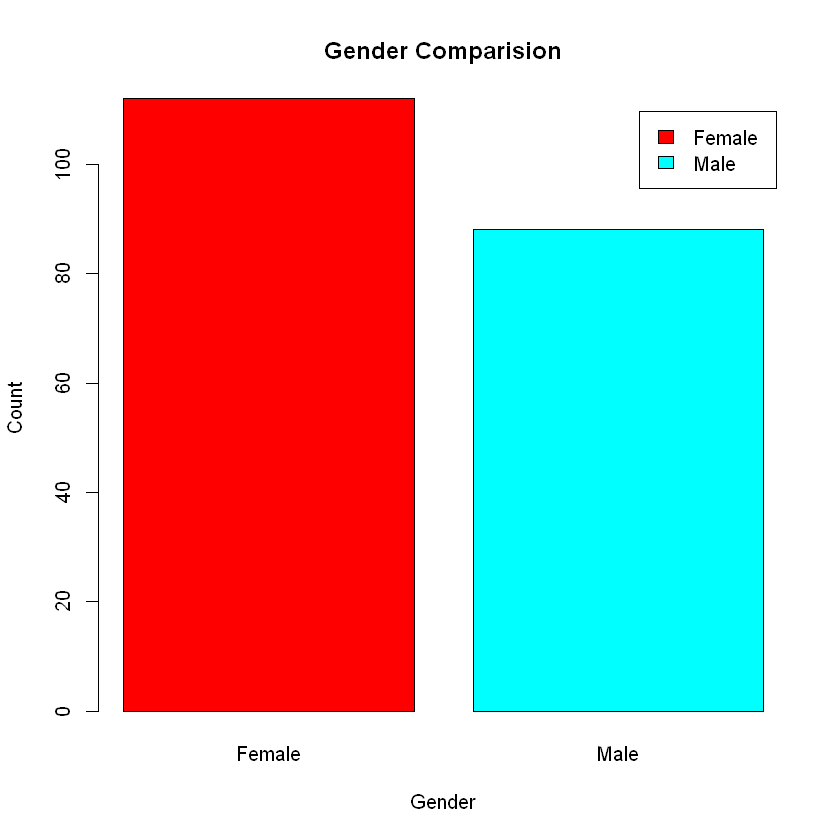

In [31]:
a=table(mall$Gender)
barplot(a,main="Gender Comparision",
       ylab="Count",
       xlab="Gender",
       col=rainbow(2),
       legend=rownames(a))

##### Female count is higher than the Male count

### 3.1.1 Gender Ratio

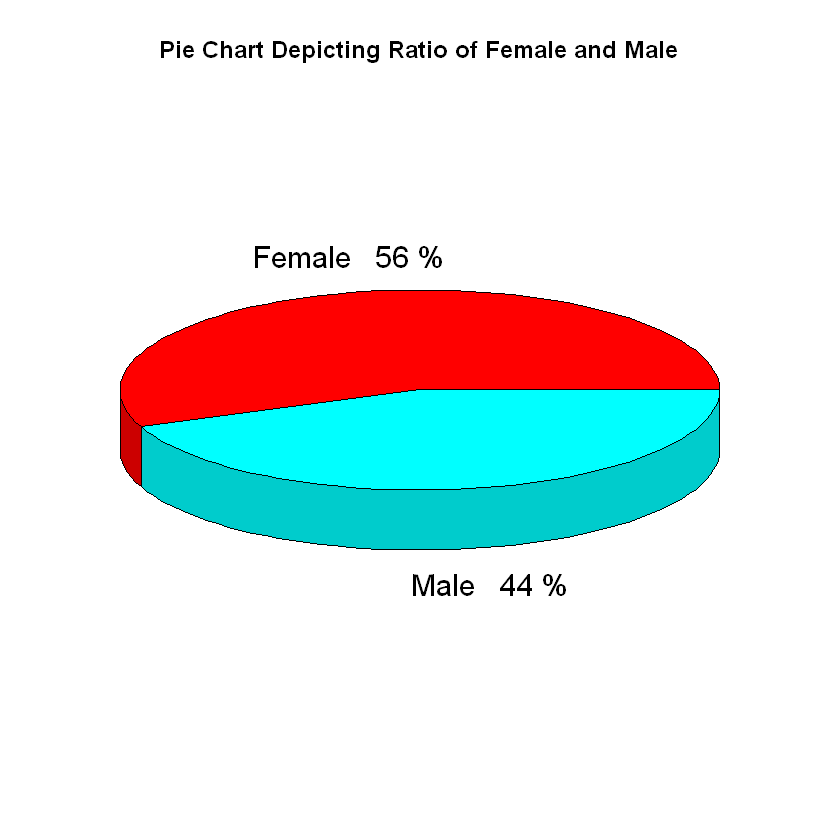

In [32]:
pct=round(a/sum(a)*100)
lbs=paste(c("Female","Male")," ",pct,"%",sep=" ")
library(plotrix)
pie3D(a,labels=lbs,
   main="Pie Chart Depicting Ratio of Female and Male")

##### Slight majority of shoppers are women

### 3.2 Visualization of Age Distribution

#### 3.2.1 Summary Statistics

In [33]:
summary(mall$Age)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  18.00   28.75   36.00   38.85   49.00   70.00 

#### 3.2.2 Age Frequency Distribution

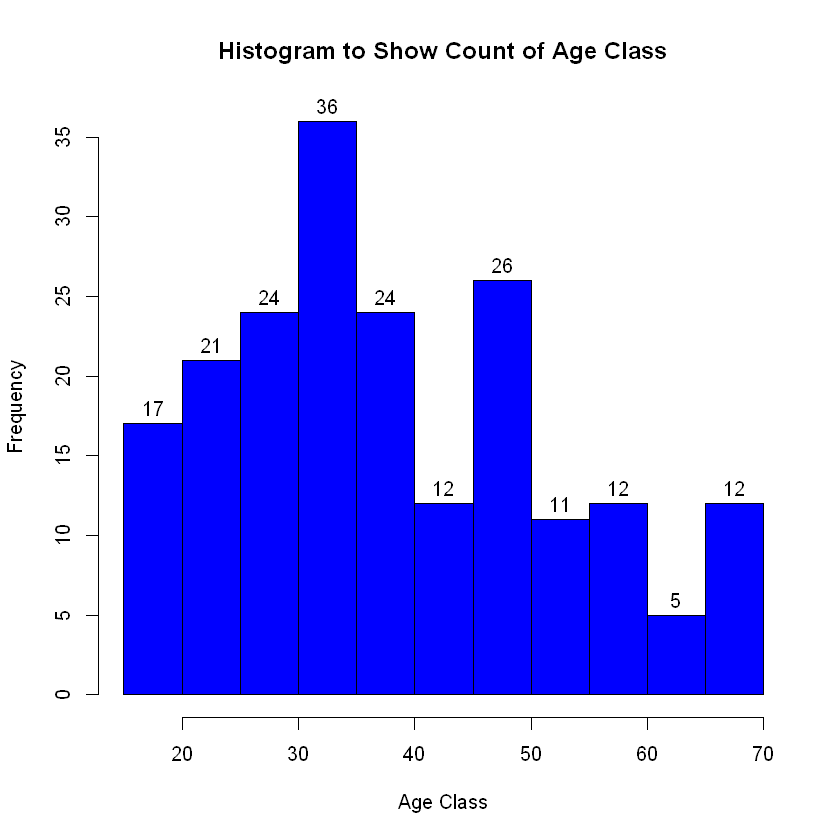

In [34]:
hist(mall$Age,
    col="blue",
    main="Histogram to Show Count of Age Class",
    xlab="Age Class",
    ylab="Frequency",
    labels=TRUE)

#### 3.2.3 Descriptive Statistics (Age) - Box Plot

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  18.00   28.75   36.00   38.85   49.00   70.00 

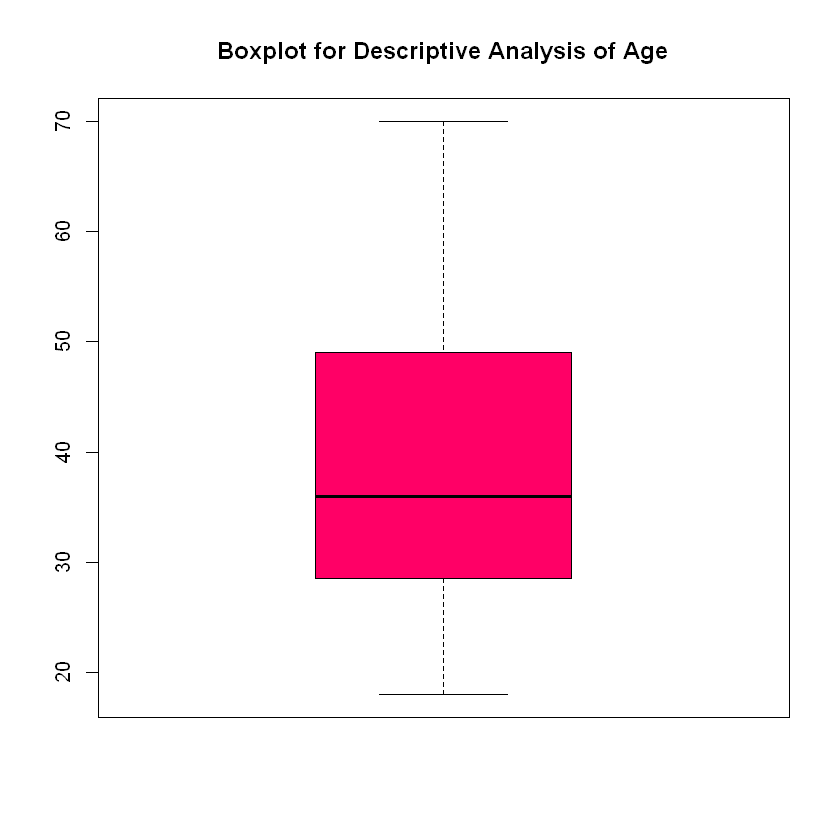

In [35]:
boxplot(mall$Age,
       col="#ff0066",
       main="Boxplot for Descriptive Analysis of Age")

summary(mall$Age)

##### Minimum Age is 18, Max Age is 70. Middle 50% Age Bracket is between 28 and 48.

### 3.3 Customer Income Analysis

#### 3.3.1 Histogram for Annual Income

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  15.00   41.50   61.50   60.56   78.00  137.00 

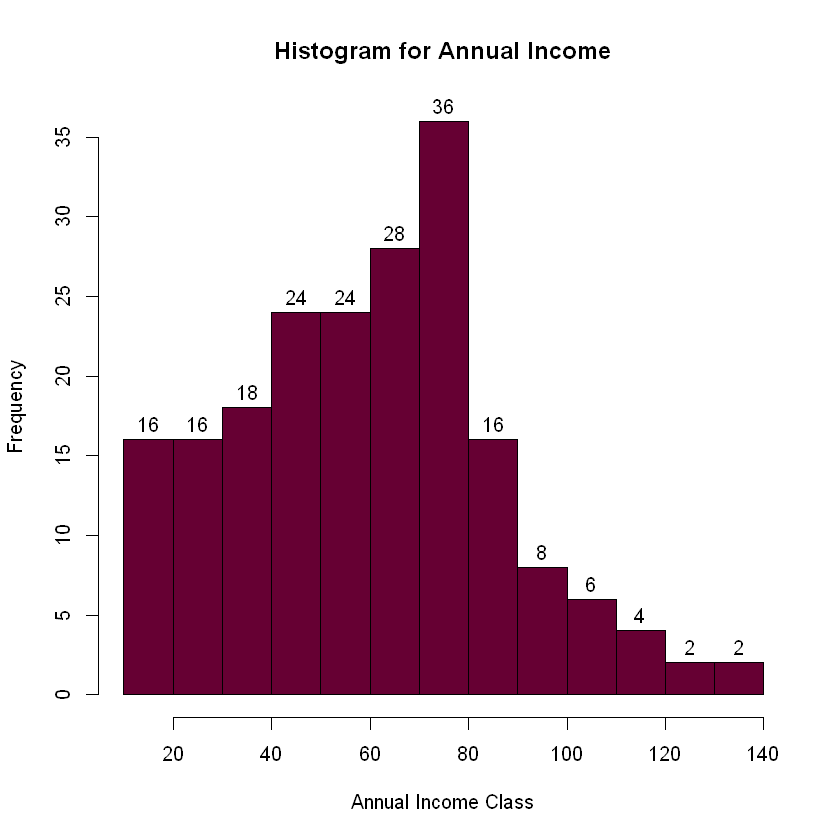

In [36]:
summary(mall$AnnualIncome)
hist(mall$AnnualIncome,
  col="#660033",
  main="Histogram for Annual Income",
  xlab="Annual Income Class",
  ylab="Frequency",
  labels=TRUE)

#### 3.3.2 Density Plot - Annual Income

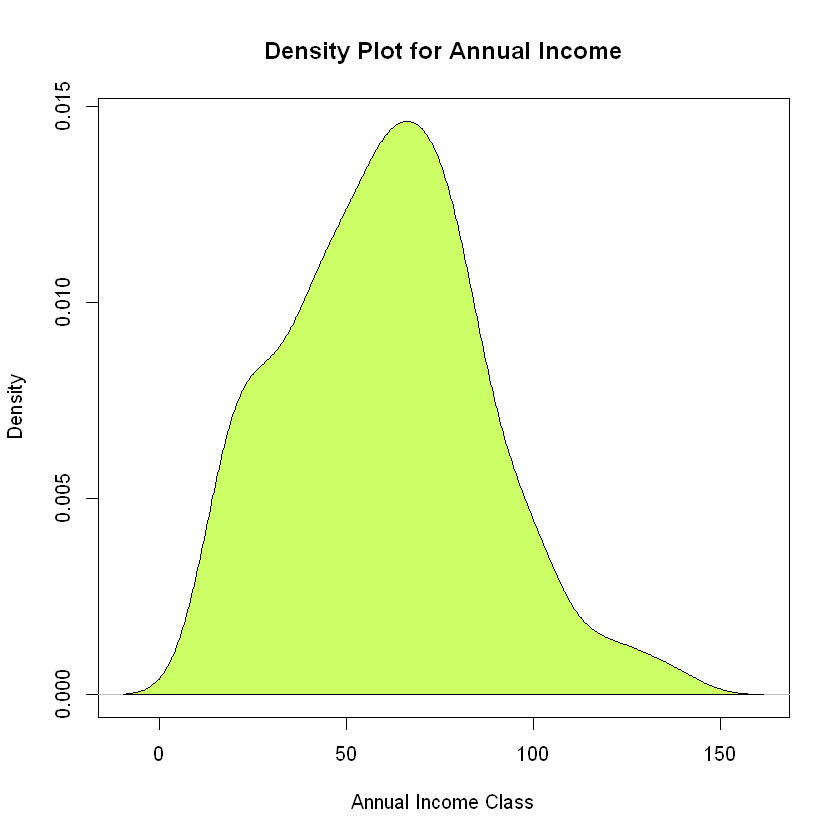

In [37]:
plot(density(mall$AnnualIncome),
    col="yellow",
    main="Density Plot for Annual Income",
    xlab="Annual Income Class",
    ylab="Density")
polygon(density(mall$AnnualIncome),
        col="#ccff66")

In [38]:
summary(mall$AnnualIncome)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  15.00   41.50   61.50   60.56   78.00  137.00 

##### Average Income 60,560. Min/Max: 15k/137k. Middle 50: 41.5k-78k. Annual Income is Normally Distributed.

### 3.4 Customer Spending Score Analysis

#### 3.4.1 Box Plot for Descriptive Analysis of Spending Score

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1.00   34.75   50.00   50.20   73.00   99.00 

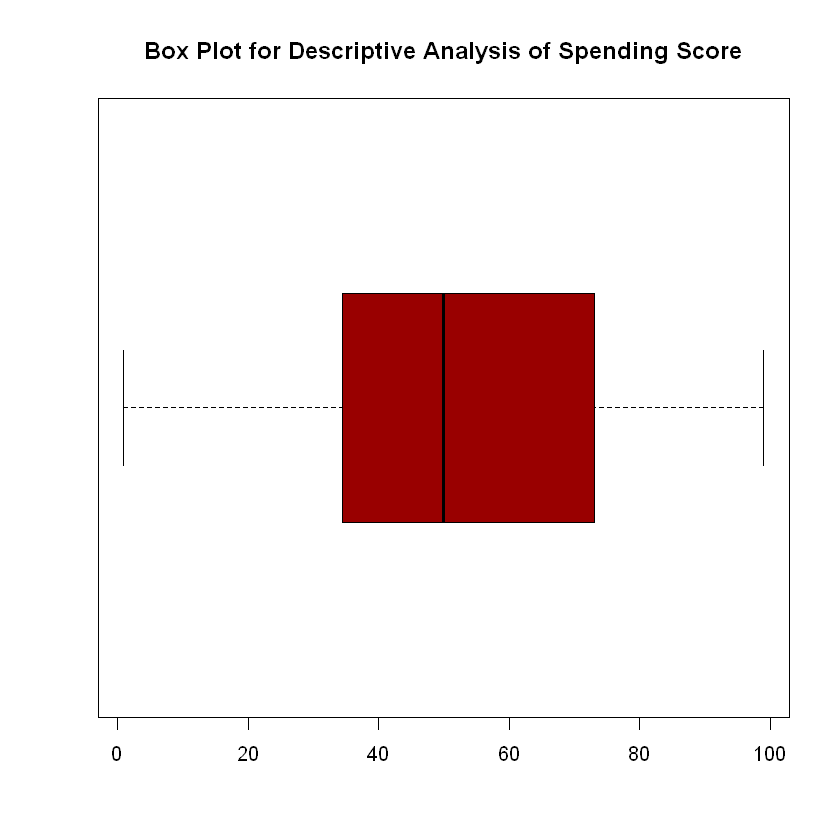

In [41]:
summary(mall$SpendingScore)

# Min. 1st Qu. Median Mean 3rd Qu. Max. 
## 1.00 34.75 50.00 50.20 73.00 99.00
boxplot(mall$SpendingScore,
   horizontal=TRUE,
   col="#990000",
   main="Box Plot for Descriptive Analysis of Spending Score")

#### Spending Score Distribution

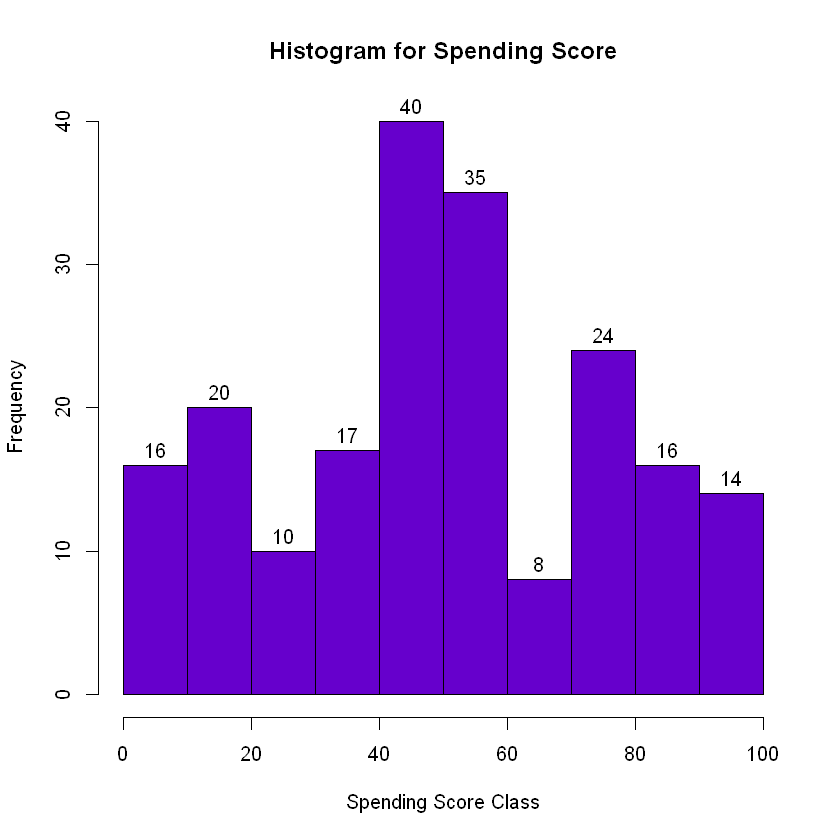

In [44]:
hist(mall$SpendingScore,
    main="Histogram for Spending Score",
    xlab="Spending Score Class",
    ylab="Frequency",
    col="#6600cc",
    labels=TRUE)

#####  Min/Max: 1,99. 
##### Mean: 50.2
##### Middle 50: ~40

## 3.5 K-Means Clustering

### 3.5.1 Determing Optimal Clusters

##### 3.5.1 A.) Elbow Method


##### 3.5.2 B.) Gap Statistic

### 3.5.1 A.) Elbow Method

##### minimize(sum W(Ck)), k=1...k

##### Ck = "kth" cluster
##### W(Ck) = intra-cluster variation --> Can determine the intra-cluster variation

In [46]:
install.packages("purrr")

Warning message:
"package 'purrr' is in use and will not be installed"

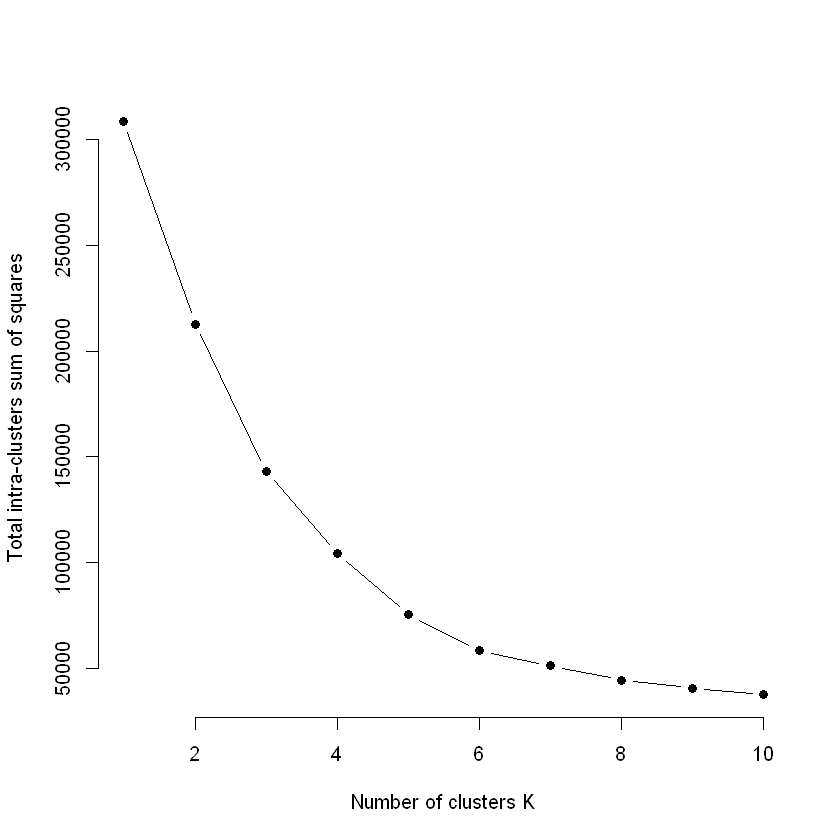

In [47]:
library(purrr)
set.seed(123)
# function to calculate total intra-cluster sum of square 
iss <- function(k) {
  kmeans(mall[,3:5],k,iter.max=100,nstart=100,algorithm="Lloyd" )$tot.withinss
}
k.values <- 1:10
iss_values <- map_dbl(k.values, iss)
plot(k.values, iss_values,
    type="b", pch = 19, frame = FALSE, 
    xlab="Number of clusters K",
    ylab="Total intra-clusters sum of squares")

##### 4 is the best number of clusters due to it appearing at the bend in the elbow plot

### 3.5.1 B.) Gap Statistic

In [53]:
install.packages('NbClust')
install.packages('factoextra')

Warning message:
"package 'NbClust' is in use and will not be installed"Warning message:
"package 'factoextra' is in use and will not be installed"

Warning message:
"package 'factoextra' was built under R version 3.6.3"Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa


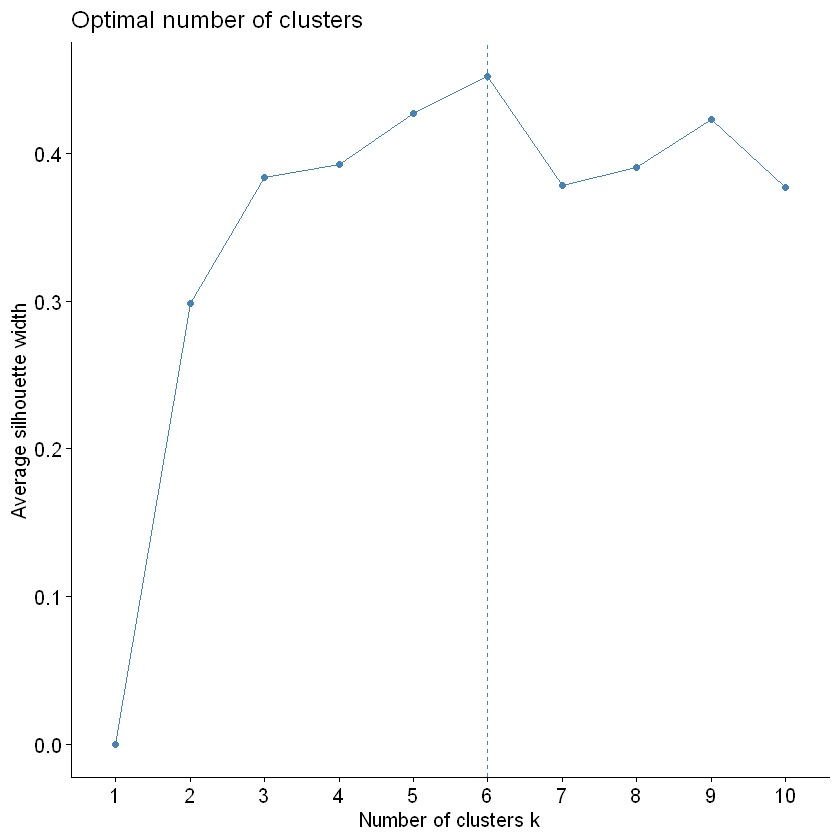

In [52]:
library(NbClust)
library(factoextra)
fviz_nbclust(mall[,3:5], kmeans, method = "silhouette")